In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read and crop the image
img = cv2.imread('../image/img_03.tif')[200:600, 200:600]
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img_gray)

In [22]:
column_means_clahe = np.mean(img_clahe, axis=0)
# Find troughs for splitting (as peaks of the negative signal), only where value < 155
split_troughs, _ = find_peaks(-column_means_clahe, prominence=5, distance=10, height=-155)
# split_troughs = np.sort(split_troughs)
split_troughs

array([ 11,  77, 142, 210, 278, 345], dtype=int64)

In [3]:
split_troughs

array([ 11,  77, 142, 210, 278, 345], dtype=int64)

In [4]:
2**64

18446744073709551616

In [5]:
if len(split_troughs) == 0:
    print("No troughs found, cannot split image.")
else:
    first_trough = split_troughs[0]
    split_indices = [first_trough] + split_troughs[split_troughs > first_trough].tolist() + [img_clahe.shape[1]]

    all_median_troughs = []

    for i in range(len(split_indices) - 1):
        left = split_indices[i]
        right = split_indices[i + 1]
        roi = img_clahe[:, left:right]
        row_medians = np.median(roi, axis=1)
        median_troughs, _ = find_peaks(-row_medians, prominence=5, distance=10, height=-155)
        for row in median_troughs:
            all_median_troughs.append([i, row])

    all_median_troughs_array = np.array(all_median_troughs)
    
all_median_troughs_array

array([[  0,   2],
       [  0,  19],
       [  0,  38],
       [  0,  57],
       [  0,  76],
       [  0,  93],
       [  0, 116],
       [  0, 132],
       [  0, 154],
       [  0, 171],
       [  0, 193],
       [  0, 211],
       [  0, 230],
       [  0, 249],
       [  0, 271],
       [  0, 288],
       [  0, 308],
       [  0, 327],
       [  0, 350],
       [  0, 368],
       [  0, 391],
       [  1,   1],
       [  1,  20],
       [  1,  43],
       [  1,  59],
       [  1,  78],
       [  1,  95],
       [  1, 117],
       [  1, 136],
       [  1, 154],
       [  1, 172],
       [  1, 192],
       [  1, 211],
       [  1, 235],
       [  1, 251],
       [  1, 269],
       [  1, 290],
       [  1, 309],
       [  1, 328],
       [  1, 349],
       [  1, 370],
       [  1, 390],
       [  2,   2],
       [  2,  22],
       [  2,  40],
       [  2,  59],
       [  2,  78],
       [  2,  98],
       [  2, 116],
       [  2, 135],
       [  2, 154],
       [  2, 173],
       [  2,

In [12]:
import numpy as np
from scipy.signal import find_peaks

if len(split_troughs) == 0:
    print("No troughs found, cannot split image.")
    roi_troughs_array = np.array([], dtype=object)
else:
    first_trough = split_troughs[0]
    split_indices = [first_trough] + split_troughs[split_troughs > first_trough].tolist() + [img_clahe.shape[1]]

    all_median_troughs = []

    for i in range(len(split_indices) - 1):
        left = split_indices[i]
        right = split_indices[i + 1]
        roi = img_clahe[:, left:right]
        row_medians = np.median(roi, axis=1)
        median_troughs, _ = find_peaks(-row_medians, prominence=5, distance=10, height=-155)
        for row in median_troughs:
            all_median_troughs.append([i, row])

    all_median_troughs_array = np.array(all_median_troughs)

    # 分组并转为object类型nparray
    num_rois = np.max(all_median_troughs_array[:, 0]) + 1
    roi_troughs_list = [all_median_troughs_array[all_median_troughs_array[:, 0] == i, 1] for i in range(num_rois)]
    roi_troughs_array = np.array(roi_troughs_list, dtype=object)

# 结果：roi_troughs_array，每个元素是一个np.array，内容是该ROI下所有trough的行索引
print(roi_troughs_array)


[array([  2,  19,  38,  57,  76,  93, 116, 132, 154, 171, 193, 211, 230,
        249, 271, 288, 308, 327, 350, 368, 391], dtype=int64)
 array([  1,  20,  43,  59,  78,  95, 117, 136, 154, 172, 192, 211, 235,
        251, 269, 290, 309, 328, 349, 370, 390], dtype=int64)
 array([  2,  22,  40,  59,  78,  98, 116, 135, 154, 173, 193, 203, 215,
        233, 253, 272, 291, 309, 329, 348, 372, 390], dtype=int64)
 array([  5,  22,  43,  60,  82,  99, 117, 137, 156, 175, 197, 213, 233,
        252, 274, 291, 310, 331, 349, 371, 391], dtype=int64)
 array([  3,  24,  42,  60,  81,  98, 118, 136, 157, 176, 194, 214, 234,
        251, 272, 290, 311, 330, 351, 369, 391], dtype=int64)
 array([  4,  22,  41,  60,  77,  98, 118, 137, 155, 174, 194, 212, 233,
        251, 270, 291, 310, 329, 351, 370, 391], dtype=int64)           ]


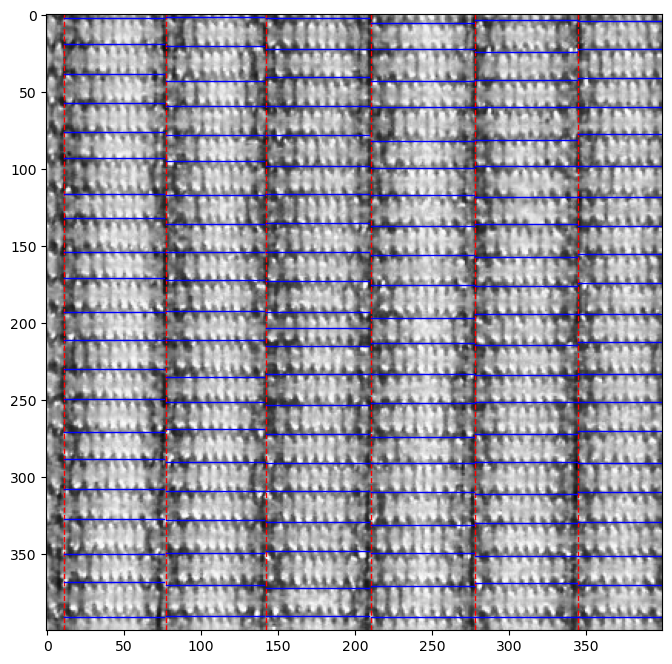

In [14]:
import matplotlib.pyplot as plt

# 假定 img_clahe, split_troughs, roi_troughs_array 已经算好

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img_clahe, cmap='gray')

# 1. 画竖线（split_troughs分割线）
for x in split_troughs:
    ax.axvline(x=x, color='red', linestyle='--', linewidth=1)

# 2. 画每个ROI的横线（每个roi_troughs_array[i]）
# 先确定每个ROI的左右边界
first_trough = split_troughs[0]
split_indices = [first_trough] + split_troughs[split_troughs > first_trough].tolist() + [img_clahe.shape[1]]

for i, rows in enumerate(roi_troughs_array):
    left = split_indices[i]
    right = split_indices[i + 1]
    for y in rows:
        # 横线从left到right-1
        ax.plot([left, right-1], [y, y], color='blue', linewidth=1)

plt.show()
